## SMS Spam Classifier: Multinomial Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Multinomial Naive Bayes
    - Model building 
    - Model evaluation

### 1. Importing and Preprocessing Data

In [1]:
import pandas as pd

# reading the training data
docs = pd.read_csv('movie_review_train.csv')
docs.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [2]:
# number of SMSes / documents
len(docs)

1600

In [112]:
# counting spam and ham instances
ham_spam = docs.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [113]:
print("spam rate is about {0}%".format(
    round((ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100), 2))

spam rate is about 13.0%


In [7]:
# mapping labels to 0 and 1
docs['label'] = docs['class'].apply(lambda x: 0 if x == 'Neg' else 1)

In [8]:
docs.head()

,class,text,label
0,Pos,a common complaint amongst film critics is ...,1
1,Pos,whew this film oozes energy the kind of b...,1
2,Pos,steven spielberg s amistad which is bas...,1
3,Pos,he has spent his entire life in an awful litt...,1
4,Pos,being that it is a foreign language film with...,1


In [9]:
# we can now drop the column 'Class'
docs = docs.drop('class', axis=1)
docs.head()

,text,label
0,a common complaint amongst film critics is ...,1
1,whew this film oozes energy the kind of b...,1
2,steven spielberg s amistad which is bas...,1
3,he has spent his entire life in an awful litt...,1
4,being that it is a foreign language film with...,1


In [10]:
# convert to X and y
X = docs.text
y = docs.label
print(X.shape)
print(y.shape)

(1600,)
(1600,)


In [11]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
X_train.head()

1145     this movie about two dysfunctional families n...
73       felix   sami bouajila     the siege     lives...
446      vampire lore and legend has always been a pop...
399      kevin smith is like a big kid    his humor is...
647      bruce lee was a bigger than life martial arti...
Name: text, dtype: object

In [13]:
y_train.head()

1145    0
73      1
446     1
399     1
647     1
Name: label, dtype: int64

In [19]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english', min_df=.03, max_df=.8)

In [20]:
vect.fit(X_train)

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [21]:
# printing the vocabulary
vect.vocabulary_

{'movie': 940,
 'really': 1149,
 'gets': 608,
 'ground': 633,
 'despite': 360,
 'good': 622,
 'performances': 1031,
 'basically': 116,
 'cast': 199,
 'eddie': 428,
 'sean': 1236,
 'robin': 1195,
 'married': 880,
 'couple': 295,
 'luck': 862,
 'living': 840,
 'city': 235,
 'spend': 1329,
 'little': 837,
 'local': 842,
 'best': 130,
 'friend': 586,
 'wife': 1575,
 'share': 1268,
 'odd': 982,
 'relationship': 1160,
 'return': 1179,
 'world': 1604,
 'love': 856,
 'soon': 1313,
 'lead': 807,
 'new': 965,
 'like': 827,
 'high': 673,
 'reach': 1139,
 'wants': 1548,
 'baby': 108,
 'father': 518,
 'deep': 349,
 'sense': 1250,
 'leaves': 814,
 'badly': 111,
 'fear': 522,
 'lies': 823,
 'happens': 650,
 'come': 250,
 'result': 1177,
 'inevitable': 728,
 'ends': 447,
 'believes': 128,
 'months': 933,
 'reality': 1145,
 '10': 1,
 'years': 1619,
 'decade': 343,
 'solid': 1308,
 'individual': 726,
 'small': 1300,
 'role': 1198,
 'life': 824,
 'falls': 503,
 'apart': 67,
 'released': 1164,
 'comes': 2

In [22]:
# vocab size
#len(vect.vocabulary_.keys())
len(vect.get_feature_names())

1624

In [24]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [25]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1)	1
  (0, 67)	1
  (0, 108)	1
  (0, 111)	1
  (0, 116)	1
  (0, 128)	1
  (0, 130)	1
  (0, 168)	1
  (0, 199)	1
  (0, 226)	1
  (0, 235)	1
  (0, 250)	1
  (0, 254)	1
  (0, 286)	1
  (0, 295)	1
  (0, 332)	1
  (0, 343)	1
  (0, 349)	1
  (0, 360)	1
  (0, 428)	14
  (0, 447)	1
  (0, 503)	1
  (0, 518)	2
  (0, 522)	1
  (0, 586)	1
  :	:
  (1199, 1103)	1
  (1199, 1115)	1
  (1199, 1160)	1
  (1199, 1161)	1
  (1199, 1176)	1
  (1199, 1199)	1
  (1199, 1229)	1
  (1199, 1245)	1
  (1199, 1264)	1
  (1199, 1300)	1
  (1199, 1313)	2
  (1199, 1361)	1
  (1199, 1378)	3
  (1199, 1410)	1
  (1199, 1420)	1
  (1199, 1444)	1
  (1199, 1448)	1
  (1199, 1457)	1
  (1199, 1485)	1
  (1199, 1487)	1
  (1199, 1520)	1
  (1199, 1562)	1
  (1199, 1586)	1
  (1199, 1604)	2
  (1199, 1618)	1


### 2. Building and Evaluating the Model

In [127]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)


In [41]:
from sklearn.naive_bayes import BernoulliNB

# instantiating bernoulli NB class
bnb=BernoulliNB()

# fitting the model
bnb.fit(X_train_transformed, y_train)

# also works
# bnb.fit(X_transformed.toarray(), y_train)

# predicting probability of test data
y_pred_class = bnb.predict(X_test_transformed)
y_pred_proba = bnb.predict_proba(X_test_transformed)

In [42]:
# note that alpha=1 is used by default for smoothing
bnb

BernoulliNB()

### Model Evaluation

In [43]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.7925

In [44]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)

array([[167,  37],
       [ 46, 150]], dtype=int64)

In [131]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1201    7]
 [  10  175]]


In [132]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9459459459459459


In [133]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.9942052980132451


In [134]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9615384615384616
0.9615384615384616


In [135]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9615384615384616
PRECISION SCORE : 0.9615384615384616
RECALL SCORE : 0.9459459459459459
F1 SCORE : 0.9536784741144414


In [136]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0])

In [137]:
y_pred_proba

array([[9.95239557e-01, 4.76044325e-03],
       [9.99852357e-01, 1.47642544e-04],
       [9.27878579e-01, 7.21214213e-02],
       ...,
       [9.99999671e-01, 3.28799076e-07],
       [3.72703622e-09, 9.99999996e-01],
       [9.99999985e-01, 1.46852511e-08]])

In [138]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [139]:
# area under the curve
print (roc_auc)

0.9921872203329157


In [140]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,FPR,TPR,Threshold
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.308108,1.000000e+00
2,0.000000,0.313514,1.000000e+00
3,0.000000,0.335135,1.000000e+00
4,0.000000,0.340541,1.000000e+00
5,0.000000,0.351351,1.000000e+00
6,0.000000,0.367568,1.000000e+00
7,0.000000,0.400000,1.000000e+00
8,0.000000,0.410811,1.000000e+00
9,0.000000,0.594595,1.000000e+00


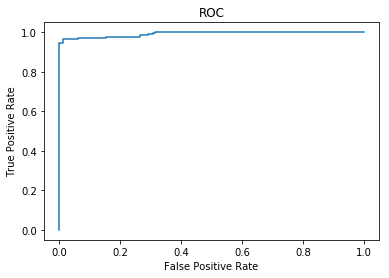

In [141]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)